In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
analysis_subset = (pd.read_csv('../data/clean/analysis_subset.csv', low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
analysis_subset['score'] = analysis_subset.score_adj

In [4]:
analysis_subset.shape

(33128, 61)

In [5]:
age_mask = (analysis_subset.age_test>=48) & (analysis_subset.age_test<60)

In [6]:
analysis_subset[age_mask].drop_duplicates(subset='student_idx').shape

(1424, 61)

In [7]:
data_4yo = analysis_subset[age_mask].drop_duplicates(subset='student_idx').copy()

## Demographics

In [8]:
data_4yo.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      761
Female    663
Name: male, dtype: int64

In [9]:
data_4yo.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       918
Black       150
Hispanic    144
Other       137
Asian        75
Name: race, dtype: int64

In [10]:
data_4yo.premature.replace({True: '>=36 weeks', False: '<36 weeks', np.nan: 'Unknown'}).value_counts()

<36 weeks     1060
Unknown        228
>=36 weeks     136
Name: premature, dtype: int64

In [11]:
data_4yo.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', 
                      np.nan:'Missing'}).value_counts()

2          590
1          337
3          272
4+         160
Missing     65
Name: sib, dtype: int64

In [12]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

data_4yo.family_inv.replace(family_lookup).value_counts()

Ideal Participation      455
Good Participation       381
Average Participation    320
Missing                  151
Below Average             95
Limited Participation     22
Name: family_inv, dtype: int64

In [13]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

data_4yo.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    387
Some high school           382
Unknown                    377
Some college               248
8th grade or less           30
Name: mother_ed, dtype: int64

In [14]:
data_4yo.father_ed.replace(ed_lookup).value_counts()

Unknown                    463
Bachelor's degree          324
Post graduate degree       225
Some college               196
High school diploma/GED    185
Some high school            28
8th grade or less            3
Name: father_ed, dtype: int64

- Age, hearing loss identified 
- Age, first amplified
- Age, any intervention
- Age, enrolled in OPTION program

In [15]:
data_4yo[['age_diag', 'age_amp', 'age_int', 'age']].describe()

,age_diag,age_amp,age_int,age
count,1168.000000,1162.000000,1089.000000,1424.000000
mean,10.633562,15.050129,16.121671,27.724719
std,13.698778,13.947141,14.411849,16.894740
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.000000,13.000000
50%,3.000000,9.000000,12.000000,28.000000
75%,19.000000,24.000000,25.000000,41.000000
max,57.000000,65.000000,60.000000,88.000000


## Hearing loss

In [16]:
data_4yo.deg_hl_below6.isnull().sum()

187

In [17]:
hl_data = data_4yo.set_index('student_idx')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [18]:
data_4yo.one_or_both_parent_hl.value_counts()

0.0    1164
1.0      88
Name: one_or_both_parent_hl, dtype: int64

In [19]:
data_4yo.one_or_both_parent_hl.isnull().sum()

172

Individuals with no hearing loss type

In [20]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      1089
bilateral_cond        43
bilateral_ansd        38
assymetrical          34
bilateral_mixed       27
unilateral_unk         0
unilateral_cond        0
unilateral_mixed       0
unilateral_ansd        0
unilateral_snhl        0
bilateral_unk          0
bilateral_normal       0
dtype: int64

In [21]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.76
bilateral_cond      0.03
bilateral_ansd      0.03
assymetrical        0.02
bilateral_mixed     0.02
unilateral_unk      0.00
unilateral_cond     0.00
unilateral_mixed    0.00
unilateral_ansd     0.00
unilateral_snhl     0.00
bilateral_unk       0.00
bilateral_normal    0.00
dtype: float64

In [22]:
tech_data = data_4yo.set_index('student_idx')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [23]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        1054
bilateral_ha         268
bimodal               75
unilateral_ci         13
unilateral_ha          5
unilateral_other       1
bilateral_other        1
dtype: int64

In [24]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.74
bilateral_ha        0.19
bimodal             0.05
unilateral_ci       0.01
unilateral_other    0.00
unilateral_ha       0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [25]:
tech_data[tech_data.sum(1)==0].index.values

array([3517, 3178, 2701, 6132,  296,  139, 3953])

## Hearing Loss

In [26]:
data_4yo.columns[data_4yo.columns.str.contains('_hl_')]

Index(['unilateral_hl_modsev', 'bilateral_hl_modsev', 'unilateral_hl_profound',
       'deg_hl_below6', 'bilateral_hl_severe', 'bilateral_hl_normal',
       'unilateral_hl_moderate', 'bilateral_hl_slight', 'unilateral_hl_slight',
       'unilateral_hl_severe', 'bilateral_hl_profound', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'unilateral_hl_mild'],
      dtype='object')

In [27]:
hl_data = data_4yo.set_index('student_idx')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [28]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     487
bilateral_hl_moderate     144
bilateral_hl_modsev       119
bilateral_hl_severe        88
bilateral_hl_mild          53
bilateral_hl_slight        10
unilateral_hl_slight        2
unilateral_hl_modsev        1
unilateral_hl_mild          1
unilateral_hl_profound      0
unilateral_hl_severe        0
unilateral_hl_moderate      0
bilateral_hl_normal         0
dtype: int64

In [29]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.34
bilateral_hl_moderate     0.10
bilateral_hl_modsev       0.08
bilateral_hl_severe       0.06
bilateral_hl_mild         0.04
bilateral_hl_slight       0.01
unilateral_hl_profound    0.00
unilateral_hl_severe      0.00
unilateral_hl_modsev      0.00
unilateral_hl_moderate    0.00
unilateral_hl_mild        0.00
unilateral_hl_slight      0.00
bilateral_hl_normal       0.00
dtype: float64

## Summary of scores by domain

In [30]:
test_scores = analysis_subset[age_mask].copy()

In [31]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [32]:
test_scores.groupby('domain').score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,927.0,84.7,16.9,10.8,75.2,85.2,98.3,115.2
Expressive Language,1183.0,85.1,21.0,36.7,69.0,85.0,102.0,142.3
Expressive Vocabulary,1275.0,97.1,19.1,0.0,85.0,98.0,110.0,147.0
Receptive Language,1187.0,89.6,20.4,33.8,75.0,90.0,105.0,150.2
Receptive Vocabulary,1289.0,94.6,18.0,10.8,83.0,95.0,107.4,159.0
Total Language,1218.0,87.1,21.7,34.7,71.4,88.0,102.0,169.6


In [33]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Language',
       'Expressive Language', 'Total Language', 'Receptive Vocabulary',
       'Articulation'], dtype=object)

In [34]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

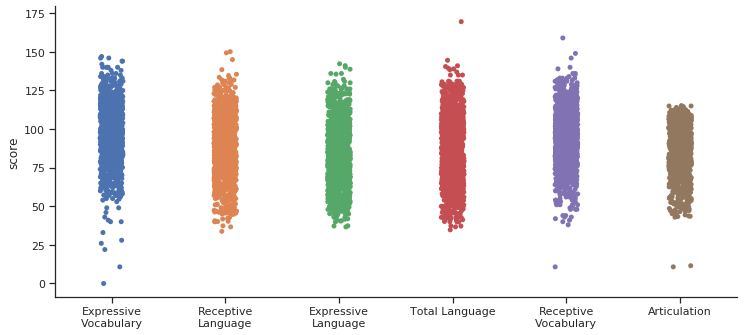

In [35]:
sns.catplot("domain_labels", y="score", data=test_scores)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

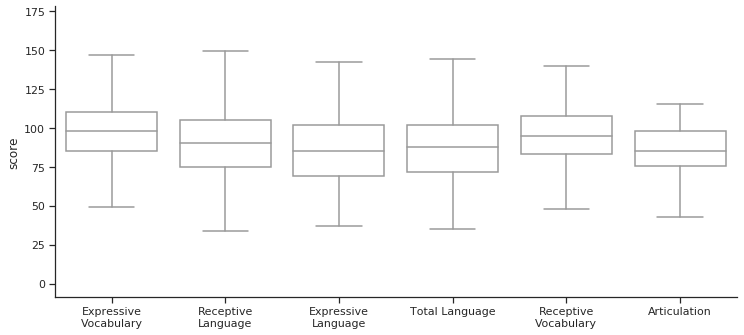

In [36]:
sns.catplot("domain_labels", y="score", data=test_scores, kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [37]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score.describe())

count        mean        std  \
domain                age_amp_greater_6                                 
Articulation          False              512.0   88.525948  15.348577   
                      True               415.0   79.918291  17.511821   
Expressive Language   False              576.0   90.830068  19.430518   
                      True               607.0   79.694615  21.084125   
Expressive Vocabulary False              705.0  100.831974  17.664917   
                      True               570.0   92.516579  19.832085   
Receptive Language    False              582.0   94.968816  18.324755   
                      True               605.0   84.508340  21.018140   
Receptive Vocabulary  False              709.0   98.616602  17.116009   
                      True               580.0   89.624555  17.888034   
Total Language        False              591.0   92.609738  19.775969   
                      True               627.0   81.900698  22.156225   

                                               min        25%         50%  \
domain                age_amp_greater_6                                     
Articulation          False              42.968096  79.007067   89.642797   
                      True               10.778705  68.269095   81.072130   
Expressive Language   False              41.623667  77.000000   92.000000   
                      True               36.659928  61.968074   77.913551   
Expressive Vocabulary False              41.000000  89.358615  101.000000   
                      True                0.000000  80.000000   93.380918   
Receptive Language    False              45.699036  83.000000   96.000000   
                      True               33.761039  67.509076   85.395064   
Receptive Vocabulary  False              38.000000  88.000000   99.293175   
                      True               10.778705  78.788123   90.030013   
Total Language        False              41.623667  78.646089   94.000000   
                      True               34.725726  64.725488   81.000000   

                                                75%         max  
domain                age_amp_greater_6                          
Articulation          False              101.127343  115.192382  
                      True                93.046107  112.922486  
Expressive Language   False              105.000000  142.263264  
                      True                96.000000  138.766553  
Expressive Vocabulary False              113.000000  146.000000  
                      True               105.244345  147.000000  
Receptive Language    False              109.000000  145.000000  
                      True               101.000000  150.150059  
Receptive Vocabulary  False              110.000000  149.000000  
                      True               101.462257  159.000000  
Total Language        False              107.748481  141.000000  
                      True                98.000000  169.578690

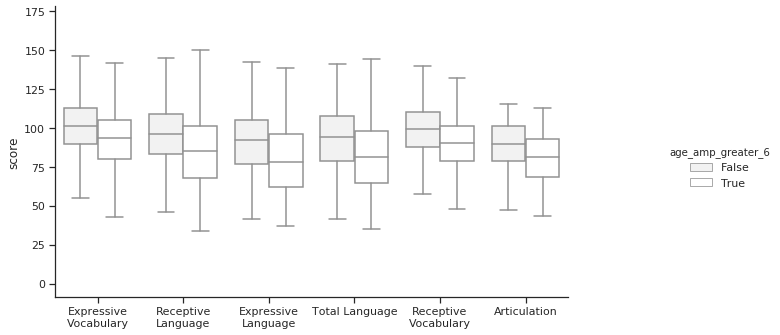

In [38]:
sns.catplot("domain_labels", y="score", hue='age_amp_greater_6', data=test_scores.assign(age_amp_greater_6=test_scores.age_amp>6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

Age of enrollment greater than 6mo.

In [39]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score.describe())

count        mean        std  \
domain                age_enroll_greater_6                                 
Articulation          False                 512.0   87.354890  16.604804   
                      True                  415.0   81.363066  16.681191   
Expressive Language   False                 576.0   88.794210  20.444072   
                      True                  607.0   81.626499  21.014534   
Expressive Vocabulary False                 696.0  100.190336  19.260713   
                      True                  579.0   93.417129  18.270483   
Receptive Language    False                 581.0   93.303161  19.458576   
                      True                  606.0   86.122542  20.709637   
Receptive Vocabulary  False                 703.0   97.189288  18.389031   
                      True                  586.0   91.428913  17.071399   
Total Language        False                 591.0   90.609322  20.777287   
                      True                  627.0   83.786257  22.039452   

                                                  min        25%         50%  \
domain                age_enroll_greater_6                                     
Articulation          False                 10.778705  78.014082   89.638201   
                      True                  44.124047  69.664951   81.676472   
Expressive Language   False                 36.659928  74.467114   89.000000   
                      True                  37.206520  64.382599   81.545823   
Expressive Vocabulary False                 10.778705  87.845301  101.093698   
                      True                   0.000000  81.567324   94.290767   
Receptive Language    False                 36.659928  81.000000   94.000000   
                      True                  33.761039  70.563964   88.000000   
Receptive Vocabulary  False                 10.778705  86.000000   98.223656   
                      True                  40.000000  80.940235   91.830459   
Total Language        False                 36.659928  76.467853   91.456522   
                      True                  34.725726  67.000000   83.827651   

                                                   75%         max  
domain                age_enroll_greater_6                          
Articulation          False                 100.926543  115.192382  
                      True                   93.530324  113.668094  
Expressive Language   False                 104.000000  142.263264  
                      True                   98.000000  138.766553  
Expressive Vocabulary False                 113.886062  146.000000  
                      True                  105.010651  147.000000  
Receptive Language    False                 108.297251  145.000000  
                      True                  101.000000  150.150059  
Receptive Vocabulary  False                 110.000000  149.000000  
                      True                  102.519480  159.000000  
Total Language        False                 106.000000  141.000000  
                      True                  100.000000  169.578690

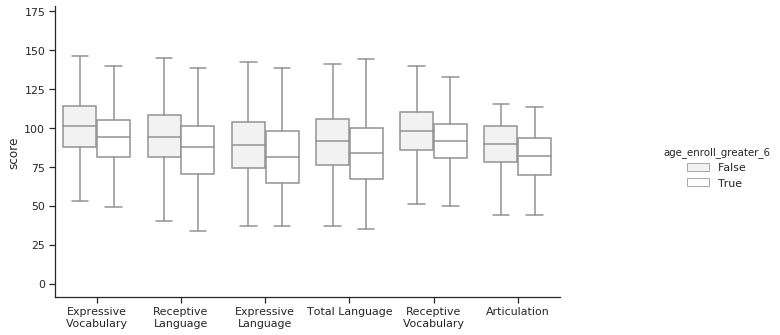

In [40]:
sns.catplot("domain_labels", y="score", hue='age_enroll_greater_6', data=test_scores.assign(age_enroll_greater_6=test_scores.age_int>6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

(Non-)Profound hearing loss

In [41]:
(test_scores.assign(non_profound_hl=test_scores.deg_hl_below6)
         .groupby(['domain', 'non_profound_hl'])
         .score.describe())

count       mean        std        min  \
domain                non_profound_hl                                           
Articulation          0.0              380.0  81.998532  17.676893  10.778705   
                      1.0              373.0  85.118157  15.922520  46.055014   
Expressive Language   0.0              589.0  80.393442  21.109124  36.659928   
                      1.0              545.0  89.831465  20.062200  40.583632   
Expressive Vocabulary 0.0              552.0  92.841594  19.633010  10.778705   
                      1.0              528.0  98.204734  17.296217   0.000000   
Receptive Language    0.0              589.0  85.302378  21.230553  33.761039   
                      1.0              549.0  93.864080  18.761122  42.152578   
Receptive Vocabulary  0.0              563.0  89.610077  17.625168  10.778705   
                      1.0              529.0  95.787018  16.173517  44.000000   
Total Language        0.0              606.0  82.213476  21.854741  34.725726   
                      1.0              563.0  91.937274  20.622215  40.000000   

                                             25%        50%         75%  \
domain                non_profound_hl                                     
Articulation          0.0              70.754176  82.651369   94.404820   
                      1.0              75.517156  84.976569   98.465991   
Expressive Language   0.0              63.237167  78.468148   96.000000   
                      1.0              75.000000  91.000000  105.000000   
Expressive Vocabulary 0.0              80.000000  94.000000  106.839383   
                      1.0              87.125501  98.315977  110.000000   
Receptive Language    0.0              69.000000  86.000000  101.000000   
                      1.0              81.000000  94.100300  107.350758   
Receptive Vocabulary  0.0              79.000000  90.060026  102.195946   
                      1.0              86.000000  97.000000  107.000000   
Total Language        0.0              65.121529  81.000000   98.239762   
                      1.0              77.000000  92.000000  107.246045   

                                              max  
domain                non_profound_hl              
Articulation          0.0              115.192382  
                      1.0              114.529956  
Expressive Language   0.0              142.263264  
                      1.0              138.766553  
Expressive Vocabulary 0.0              146.000000  
                      1.0              147.000000  
Receptive Language    0.0              145.000000  
                      1.0              150.150059  
Receptive Vocabulary  0.0              133.000000  
                      1.0              159.000000  
Total Language        0.0              139.018843  
                      1.0              169.578690

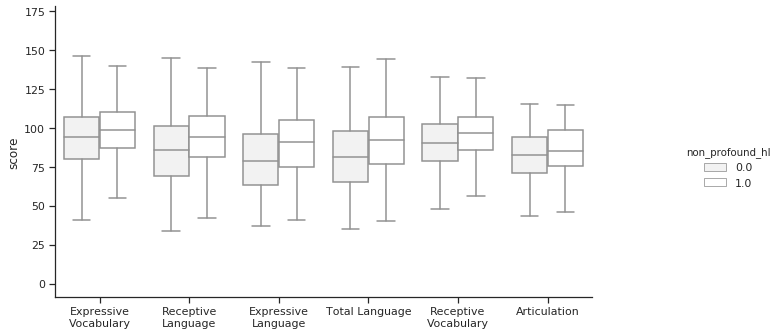

In [42]:
sns.catplot("domain_labels", y="score", hue='non_profound_hl', data=test_scores.assign(non_profound_hl=test_scores.deg_hl_below6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

Mother with(out) college education

In [43]:
test_scores.groupby(['domain', 'mother_college']).score.describe()

count        mean        std        min  \
domain                mother_college                                            
Articulation          0.0             485.0   83.623094  16.597182  11.495801   
                      1.0             130.0   86.115428  17.276292  46.571195   
Expressive Language   0.0             710.0   83.604536  20.149220  36.659928   
                      1.0             230.0   95.202592  21.136706  45.000000   
Expressive Vocabulary 0.0             702.0   95.162798  18.854728   0.000000   
                      1.0             226.0  102.588488  18.002799  49.000000   
Receptive Language    0.0             716.0   88.433600  19.546702  36.659928   
                      1.0             229.0   98.697383  19.574646  46.855839   
Receptive Vocabulary  0.0             708.0   92.424385  17.201045  38.000000   
                      1.0             230.0  100.676614  17.069895  42.000000   
Total Language        0.0             735.0   85.431636  20.754397  36.659928   
                      1.0             237.0   97.858975  21.410701  46.855839   

                                            25%         50%         75%  \
domain                mother_college                                      
Articulation          0.0             74.178033   83.649138   97.174856   
                      1.0             77.407196   87.875052  100.952282   
Expressive Language   0.0             67.849490   83.039955   99.487713   
                      1.0             79.308174   97.222612  110.563139   
Expressive Vocabulary 0.0             83.000000   96.199613  107.646254   
                      1.0             91.535039  103.000000  116.112121   
Receptive Language    0.0             74.583616   90.000000  103.000000   
                      1.0             86.000000  101.000000  113.000000   
Receptive Vocabulary  0.0             82.000000   93.345114  104.569085   
                      1.0             89.974824  102.000000  112.000000   
Total Language        0.0             70.469098   86.000000  100.553712   
                      1.0             83.000000  100.000000  112.304954   

                                             max  
domain                mother_college              
Articulation          0.0             115.192382  
                      1.0             114.932703  
Expressive Language   0.0             142.263264  
                      1.0             140.000000  
Expressive Vocabulary 0.0             146.000000  
                      1.0             147.000000  
Receptive Language    0.0             135.510453  
                      1.0             150.150059  
Receptive Vocabulary  0.0             136.000000  
                      1.0             159.000000  
Total Language        0.0             139.018843  
                      1.0             169.578690

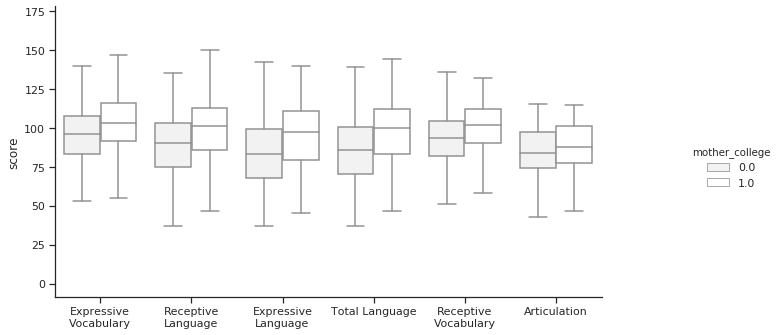

In [44]:
sns.catplot("domain_labels", y="score", hue='mother_college', data=test_scores,
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');